In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

#from numba import jit,prange

import time
import os

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
df = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/corr_matrices200.csv',index_col=['Institution','Subject','Run'])
phenotypic = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/phenotypic200.csv',index_col=['Institution','Subject'])
motion = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/motion200.csv',index_col=['Institution','File'])


## Correlation matrix

In [9]:
def correlation_matrix(size, corr):
    corr_matrix = np.zeros((size,size))
    cont = 0

    for i in range(size):
        for j in range(i, size):
            if i == j:
                corr_matrix[i,j] = float('nan')


            else:
                corr_matrix[i,j] = corr[cont]
                corr_matrix[j,i] = corr[cont]
                cont += 1 
    return corr_matrix

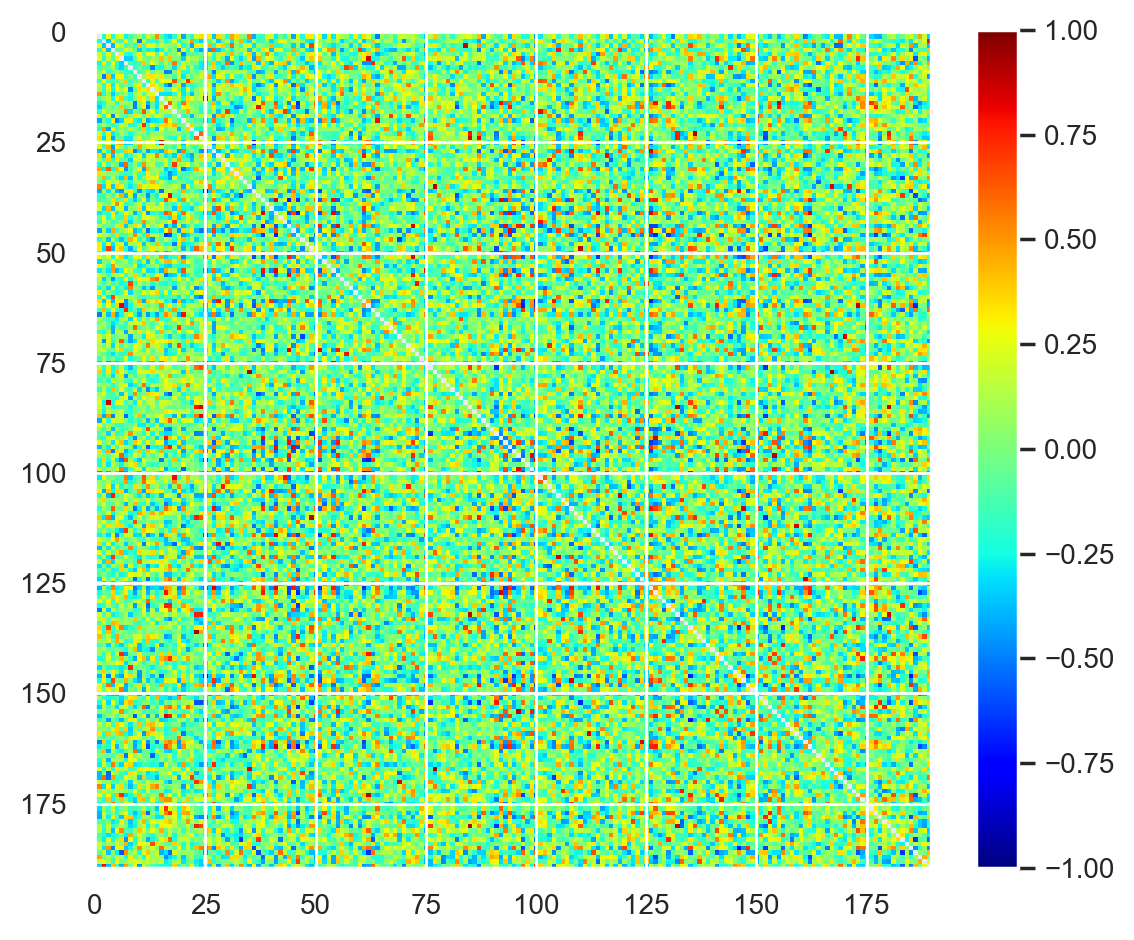

In [10]:
plt.figure(dpi=200)
im = plt.imshow(correlation_matrix(190,df.iloc[2].values), cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(-1,1)
plt.tight_layout()
#plt.savefig("connectivity_matrix_sample.png", dpi=200)

### Correlation distribution

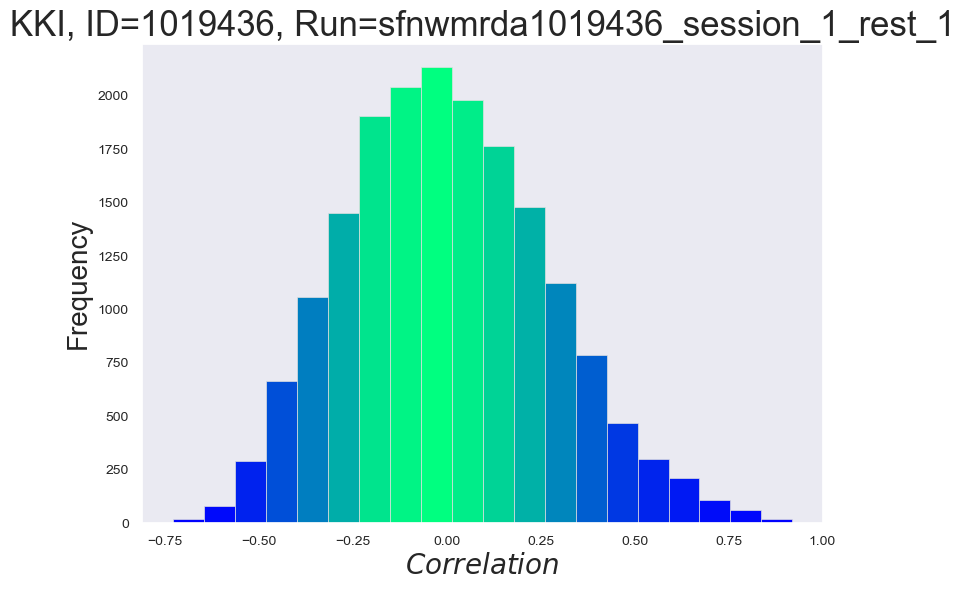

In [11]:
plt.figure(figsize=(8,6))
bins = 20
n, bins, patches = plt.hist((df.iloc[2,1:].values),bins=bins, facecolor='#2ab0ff',edgecolor='#e0e0e0',linewidth=0.5)

n = n.astype('int') # it MUST be integer

# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.winter(n[i]/max(n)))


plt.title("{}, ID={}, Run={}".format(df.iloc[2].name[0], df.iloc[2].name[1],df.iloc[2].name[2][:32]),fontsize=25)
plt.xlabel(r"$Correlation $")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid()
#plt.savefig("Sample_hist.png", dpi=200)

## Eda

In [12]:
phenotypic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 776 entries, ('WashU', 15001) to ('KKI', 9922944)
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site             776 non-null    int64  
 1   Gender           775 non-null    float64
 2   Age              776 non-null    float64
 3   Handedness       775 non-null    float64
 4   DX               776 non-null    int64  
 5   Secondary Dx     121 non-null    object 
 6   ADHD Measure     578 non-null    float64
 7   ADHD Index       499 non-null    float64
 8   Inattentive      578 non-null    float64
 9   Hyper/Impulsive  578 non-null    float64
 10  IQ Measure       728 non-null    float64
 11  Verbal IQ        588 non-null    float64
 12  Performance IQ   588 non-null    float64
 13  Full2 IQ         89 non-null     float64
 14  Full4 IQ         728 non-null    float64
 15  Med Status       578 non-null    float64
 16  Study #          61 non-null     f

#### Gender distribution

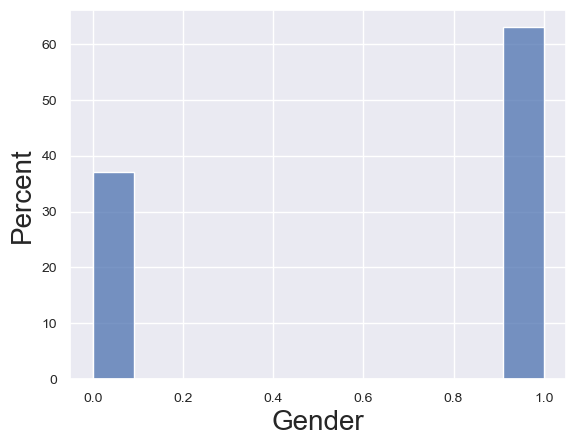

In [13]:
sns.histplot(data=phenotypic, x='Gender',stat='percent')

plt.show()

#### Age distribution

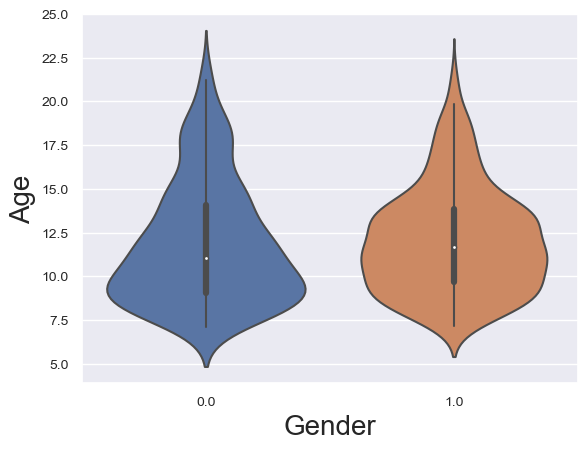

In [14]:
sns.violinplot(data=phenotypic, y='Age',x='Gender',stat='percent')
plt.show()

#### ADHD 

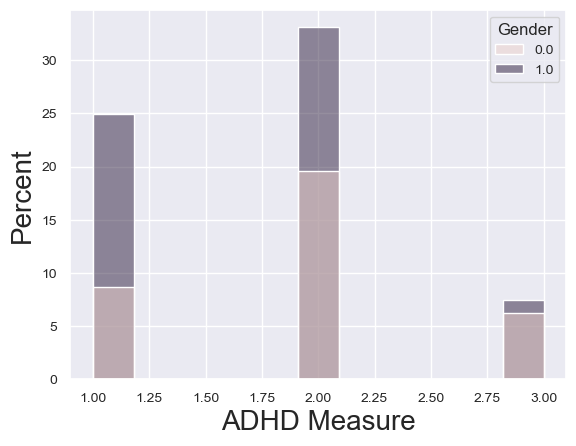

In [15]:
sns.histplot(data=phenotypic, x='ADHD Measure'  , stat='percent', hue='Gender')
plt.show()

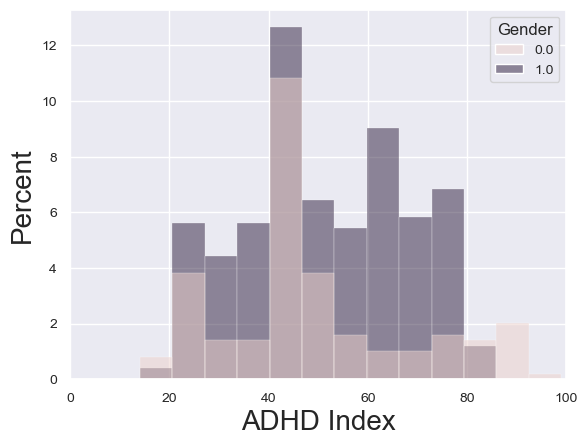

In [16]:
sns.histplot(data=phenotypic, x='ADHD Index'  , stat='percent', hue='Gender')

plt.xlim(0,100)
plt.show()

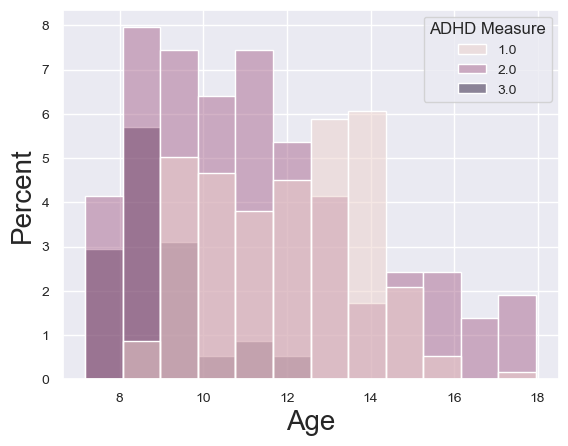

In [17]:
sns.histplot(data=phenotypic, x='Age'  , stat='percent', hue='ADHD Measure')
plt.show()

We must verify if the model is indeed identifying AGE or ADHD Measure

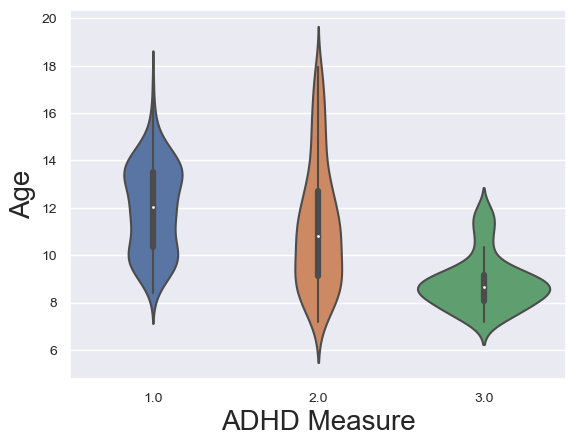

In [18]:
sns.violinplot(data=phenotypic, y='Age',x='ADHD Measure'  , stat='percent')
plt.show()

#### Quality check

In [19]:
phenotypic['QC_Rest_1'].value_counts()

 1.0      609
 0.0       89
-999.0     11
Name: QC_Rest_1, dtype: int64

In [20]:
phenotypic['QC_Anatomical_1'].value_counts()

 1.0      671
 0.0       32
-999.0     11
Name: QC_Anatomical_1, dtype: int64

## Head motion

In [21]:
motion.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1198 entries, ('WashU', 'rp_0015001_session_4_rest_1.1D') to ('KKI', 'rp_9922944_session_1_rest_1.1D')
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Max Motion (mm)           1198 non-null   float64
 1   Max Motion Time Point     1198 non-null   int64  
 2    Max Rotation (degree)    1198 non-null   float64
 3    Max Rotation Time Point  1198 non-null   int64  
 4    Max X (mm)               1198 non-null   float64
 5    Max Y (mm)               1198 non-null   float64
 6    Max Z (mm)               1198 non-null   float64
 7    Max Roll (degree)        1198 non-null   float64
 8    Max Pitch (degree)       1198 non-null   float64
 9    Max Yaw (degree)         1198 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 139.2+ KB


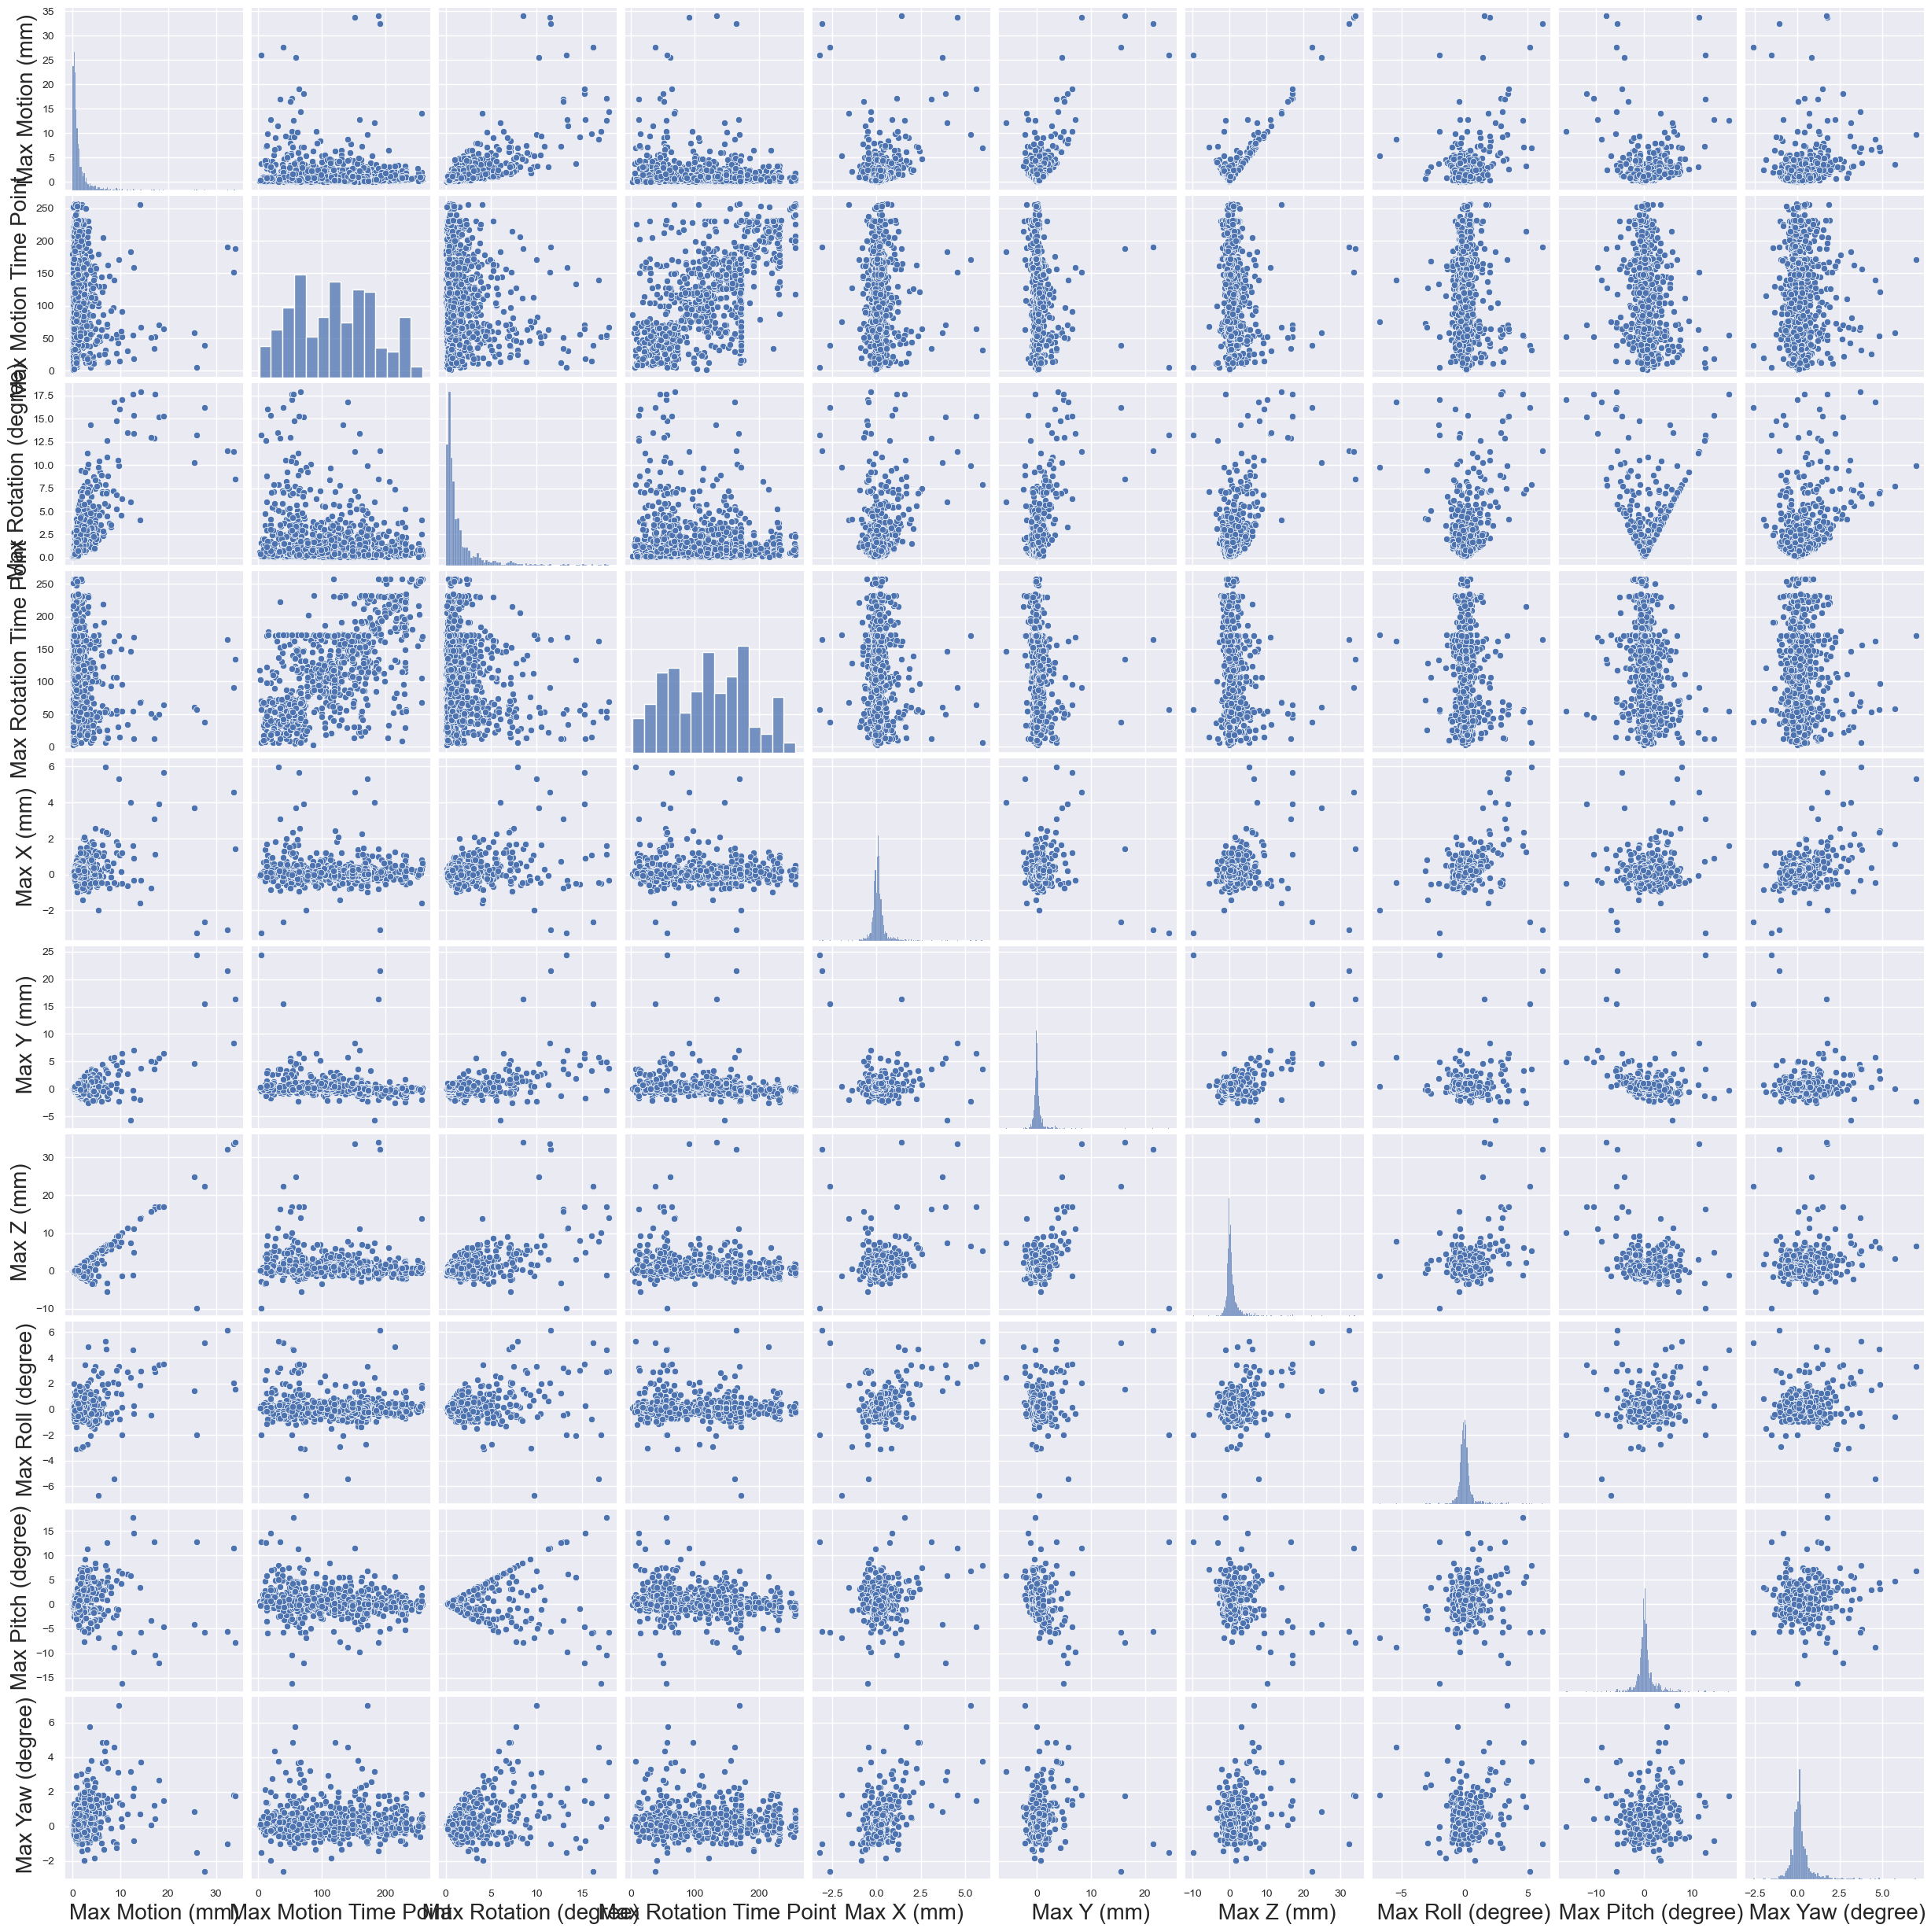

In [22]:
sns.pairplot(motion)

In [23]:
df

0  \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc200_TCs.1D   0.062784   
                    sfnwmrda1018959_session_1_rest_1_cc200_TCs.1D  0.082767   
            1019436 sfnwmrda1019436_session_1_rest_1_cc200_TCs.1D  0.216872   
                    snwmrda1019436_session_1_rest_1_cc200_TCs.1D   0.182301   
            1043241 sfnwmrda1043241_session_1_rest_1_cc200_TCs.1D -0.060757   
...                                                                     ...   
WashU       15062   snwmrda0015062_session_1_rest_3_cc200_TCs.1D  -0.021718   
                    snwmrda0015062_session_1_rest_2_cc200_TCs.1D  -0.180944   
                    sfnwmrda0015062_session_1_rest_2_cc200_TCs.1D -0.134401   
                    sfnwmrda0015062_session_1_rest_1_cc200_TCs.1D -0.064805   
                    snwmrda0015062_session_1_rest_1_cc200_TCs.1D   0.026965   

                                                                          1  \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc200_TCs.1D  -0.299914   
                    sfnwmrda1018959_session_1_rest_1_cc200_TCs.1D -0.202121   
            1019436 sfnwmrda1019436_session_1_rest_1_cc200_TCs.1D -0.055456   
                    snwmrda1019436_session_1_rest_1_cc200_TCs.1D   0.021330   
            1043241 sfnwmrda1043241_session_1_rest_1_cc200_TCs.1D  0.218841   
...                                                                     ...   
WashU       15062   snwmrda0015062_session_1_rest_3_cc200_TCs.1D   0.125678   
                    snwmrda0015062_session_1_rest_2_cc200_TCs.1D   0.140382   
                    sfnwmrda0015062_session_1_rest_2_cc200_TCs.1D  0.144484   
                    sfnwmrda0015062_session_1_rest_1_cc200_TCs.1D -0.124670   
                    snwmrda0015062_session_1_rest_1_cc200_TCs.1D  -0.062537   

                                                                          2  \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc200_TCs.1D  -0.115178   
                    sfnwmrda1018959_session_1_rest_1_cc200_TCs.1D -0.253291   
            1019436 sfnwmrda1019436_session_1_rest_1_cc200_TCs.1D  0.274632   
                    snwmrda1019436_session_1_rest_1_cc200_TCs.1D   0.220501   
            1043241 sfnwmrda1043241_session_1_rest_1_cc200_TCs.1D -0.220541   
...                                                                     ...   
WashU       15062   snwmrda0015062_session_1_rest_3_cc200_TCs.1D  -0.249868   
                    snwmrda0015062_session_1_rest_2_cc200_TCs.1D  -0.124513   
                    sfnwmrda0015062_session_1_rest_2_cc200_TCs.1D -0.073773   
                    sfnwmrda0015062_session_1_rest_1_cc200_TCs.1D -0.040828   
                    snwmrda0015062_session_1_rest_1_cc200_TCs.1D  -0.109554   

                                                                          3  \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc200_TCs.1D   0.041176   
                    sfnwmrda1018959_session_1_rest_1_cc200_TCs.1D  0.143162   
            1019436 sfnwmrda1019436_session_1_rest_1_cc200_TCs.1D  0.057173   
                    snwmrda1019436_session_1_rest_1_cc200_TCs.1D   0.112301   
            1043241 sfnwmrda1043241_session_1_rest_1_cc200_TCs.1D -0.009787   
...                                                                     ...   
WashU       15062   snwmrda0015062_session_1_rest_3_cc200_TCs.1D   0.050053   
                    snwmrda0015062_session_1_rest_2_cc200_TCs.1D  -0.030457   
                    sfnwmrda0015062_session_1_rest_2_cc200_TCs.1D -0.070069   
                    sfnwmrda0015062_session_1_rest_1_cc200_TCs.1D  0.036085   
                    snwmrda0015062_session

In [24]:
motion

Max Motion (mm)  \
Institution File                                              
WashU       rp_0015001_session_4_rest_1.1D            0.422   
            rp_0015001_session_4_rest_2.1D            0.469   
            rp_0015001_session_4_rest_3.1D            0.412   
            rp_0015001_session_4_rest_4.1D            0.645   
            rp_0015001_session_4_rest_5.1D            0.875   
...                                                     ...   
KKI         rp_8337695_session_1_rest_1.1D            2.362   
            rp_8432725_session_1_rest_1.1D            1.638   
            rp_8628223_session_1_rest_1.1D            1.483   
            rp_8658218_session_1_rest_1.1D            2.530   
            rp_9922944_session_1_rest_1.1D            1.142   

                                            Max Motion Time Point  \
Institution File                                                    
WashU       rp_0015001_session_4_rest_1.1D                     45   
            rp_0015001_session_4_rest_2.1D                     21   
            rp_0015001_session_4_rest_3.1D                     38   
            rp_0015001_session_4_rest_4.1D                     23   
            rp_0015001_session_4_rest_5.1D                     71   
...                                                           ...   
KKI         rp_8337695_session_1_rest_1.1D                    104   
            rp_8432725_session_1_rest_1.1D                     54   
            rp_8628223_session_1_rest_1.1D                     98   
            rp_8658218_session_1_rest_1.1D                    118   
            rp_9922944_session_1_rest_1.1D                    148   

                                             Max Rotation (degree)  \
Institution File                                                     
WashU       rp_0015001_session_4_rest_1.1D                   0.254   
            rp_0015001_session_4_rest_2.1D                   0.250   
            rp_0015001_session_4_rest_3.1D                   2.098   
            rp_0015001_session_4_rest_4.1D                   0.560   
            rp_0015001_session_4_rest_5.1D                   0.811   
...                                                            ...   
KKI         rp_8337695_session_1_rest_1.1D                   3.065   
            rp_8432725_session_1_rest_1.1D                   4.338   
            rp_8628223_session_1_rest_1.1D                   0.830   
            rp_8658218_session_1_rest_1.1D                   5.735   
            rp_9922944_session_1_rest_1.1D                   0.742   

                                             Max Rotation Time Point  \
Institution File                                                       
WashU       rp_0015001_session_4_rest_1.1D                        62   
            rp_0015001_session_4_rest_2.1D                        57   
            rp_0015001_session_4_rest_3.1D                        35   
            rp_0015001_session_4_rest_4.1D                         7   
            rp_0015001_session_4_rest_5.1D                        32   
...                                                              ...   
KKI         rp_8337695_session_1_rest_1.1D                       125   
            rp_8432725_session_1_rest_1.1D                        54   
            rp_8628223_session_1_rest_1.1D                       148   
            rp_8658218_session_1_rest_1.1D                       118   
            rp_9922944_session_1_rest_1.1D                       108   

                                             Max X (mm)   Max Y (mm)  \
Institution File                                                       
WashU       rp_0015001_session_4_rest_1.1D        0.071       -0.184   
            rp_0015001_session_4_rest_2.1D       -0.121       -0.055   
            rp_0015001_session_4_rest_3.1D       -0.208        0.171   
            rp_0015001_session_4_rest_4.1D        0.195       -0.005   
            rp_0015001_session_4_rest_5.1D    

In [25]:
motion.loc['KKI',:]

,Max Motion (mm),Max Motion Time Point,Max Rotation (degree),Max Rotation Time Point,Max X (mm),Max Y (mm),Max Z (mm),Max Roll (degree),Max Pitch (degree),Max Yaw (degree)
File,,,,,,,,,,
rp_1018959_session_1_rest_1.1D,1.214,146,0.566,81,0.185,1.110,-0.436,0.406,0.499,0.145
rp_1019436_session_1_rest_1.1D,0.923,117,0.512,125,0.152,0.762,0.695,0.316,-0.066,0.167
rp_1043241_session_1_rest_1.1D,0.925,148,1.155,132,0.257,0.898,0.195,-0.052,1.123,-0.286
rp_1266183_session_1_rest_1.1D,1.440,118,0.452,119,0.046,1.083,0.951,0.114,-0.409,-0.069
rp_1535233_session_1_rest_1.1D,1.151,113,1.244,148,0.253,0.605,1.024,-0.100,1.120,-0.532
...,...,...,...,...,...,...,...,...,...,...
rp_8337695_session_1_rest_1.1D,2.362,104,3.065,125,0.354,0.577,-1.425,0.600,3.013,0.140
rp_8432725_session_1_rest_1.1D,1.638,54,4.338,54,1.229,-0.071,0.356,0.219,4.252,-0.033
rp_8628223_session_1_rest_1.1D,1.483,98,0.830,148,0.106,1.082,-0.285,0.063,0.827,0.089
